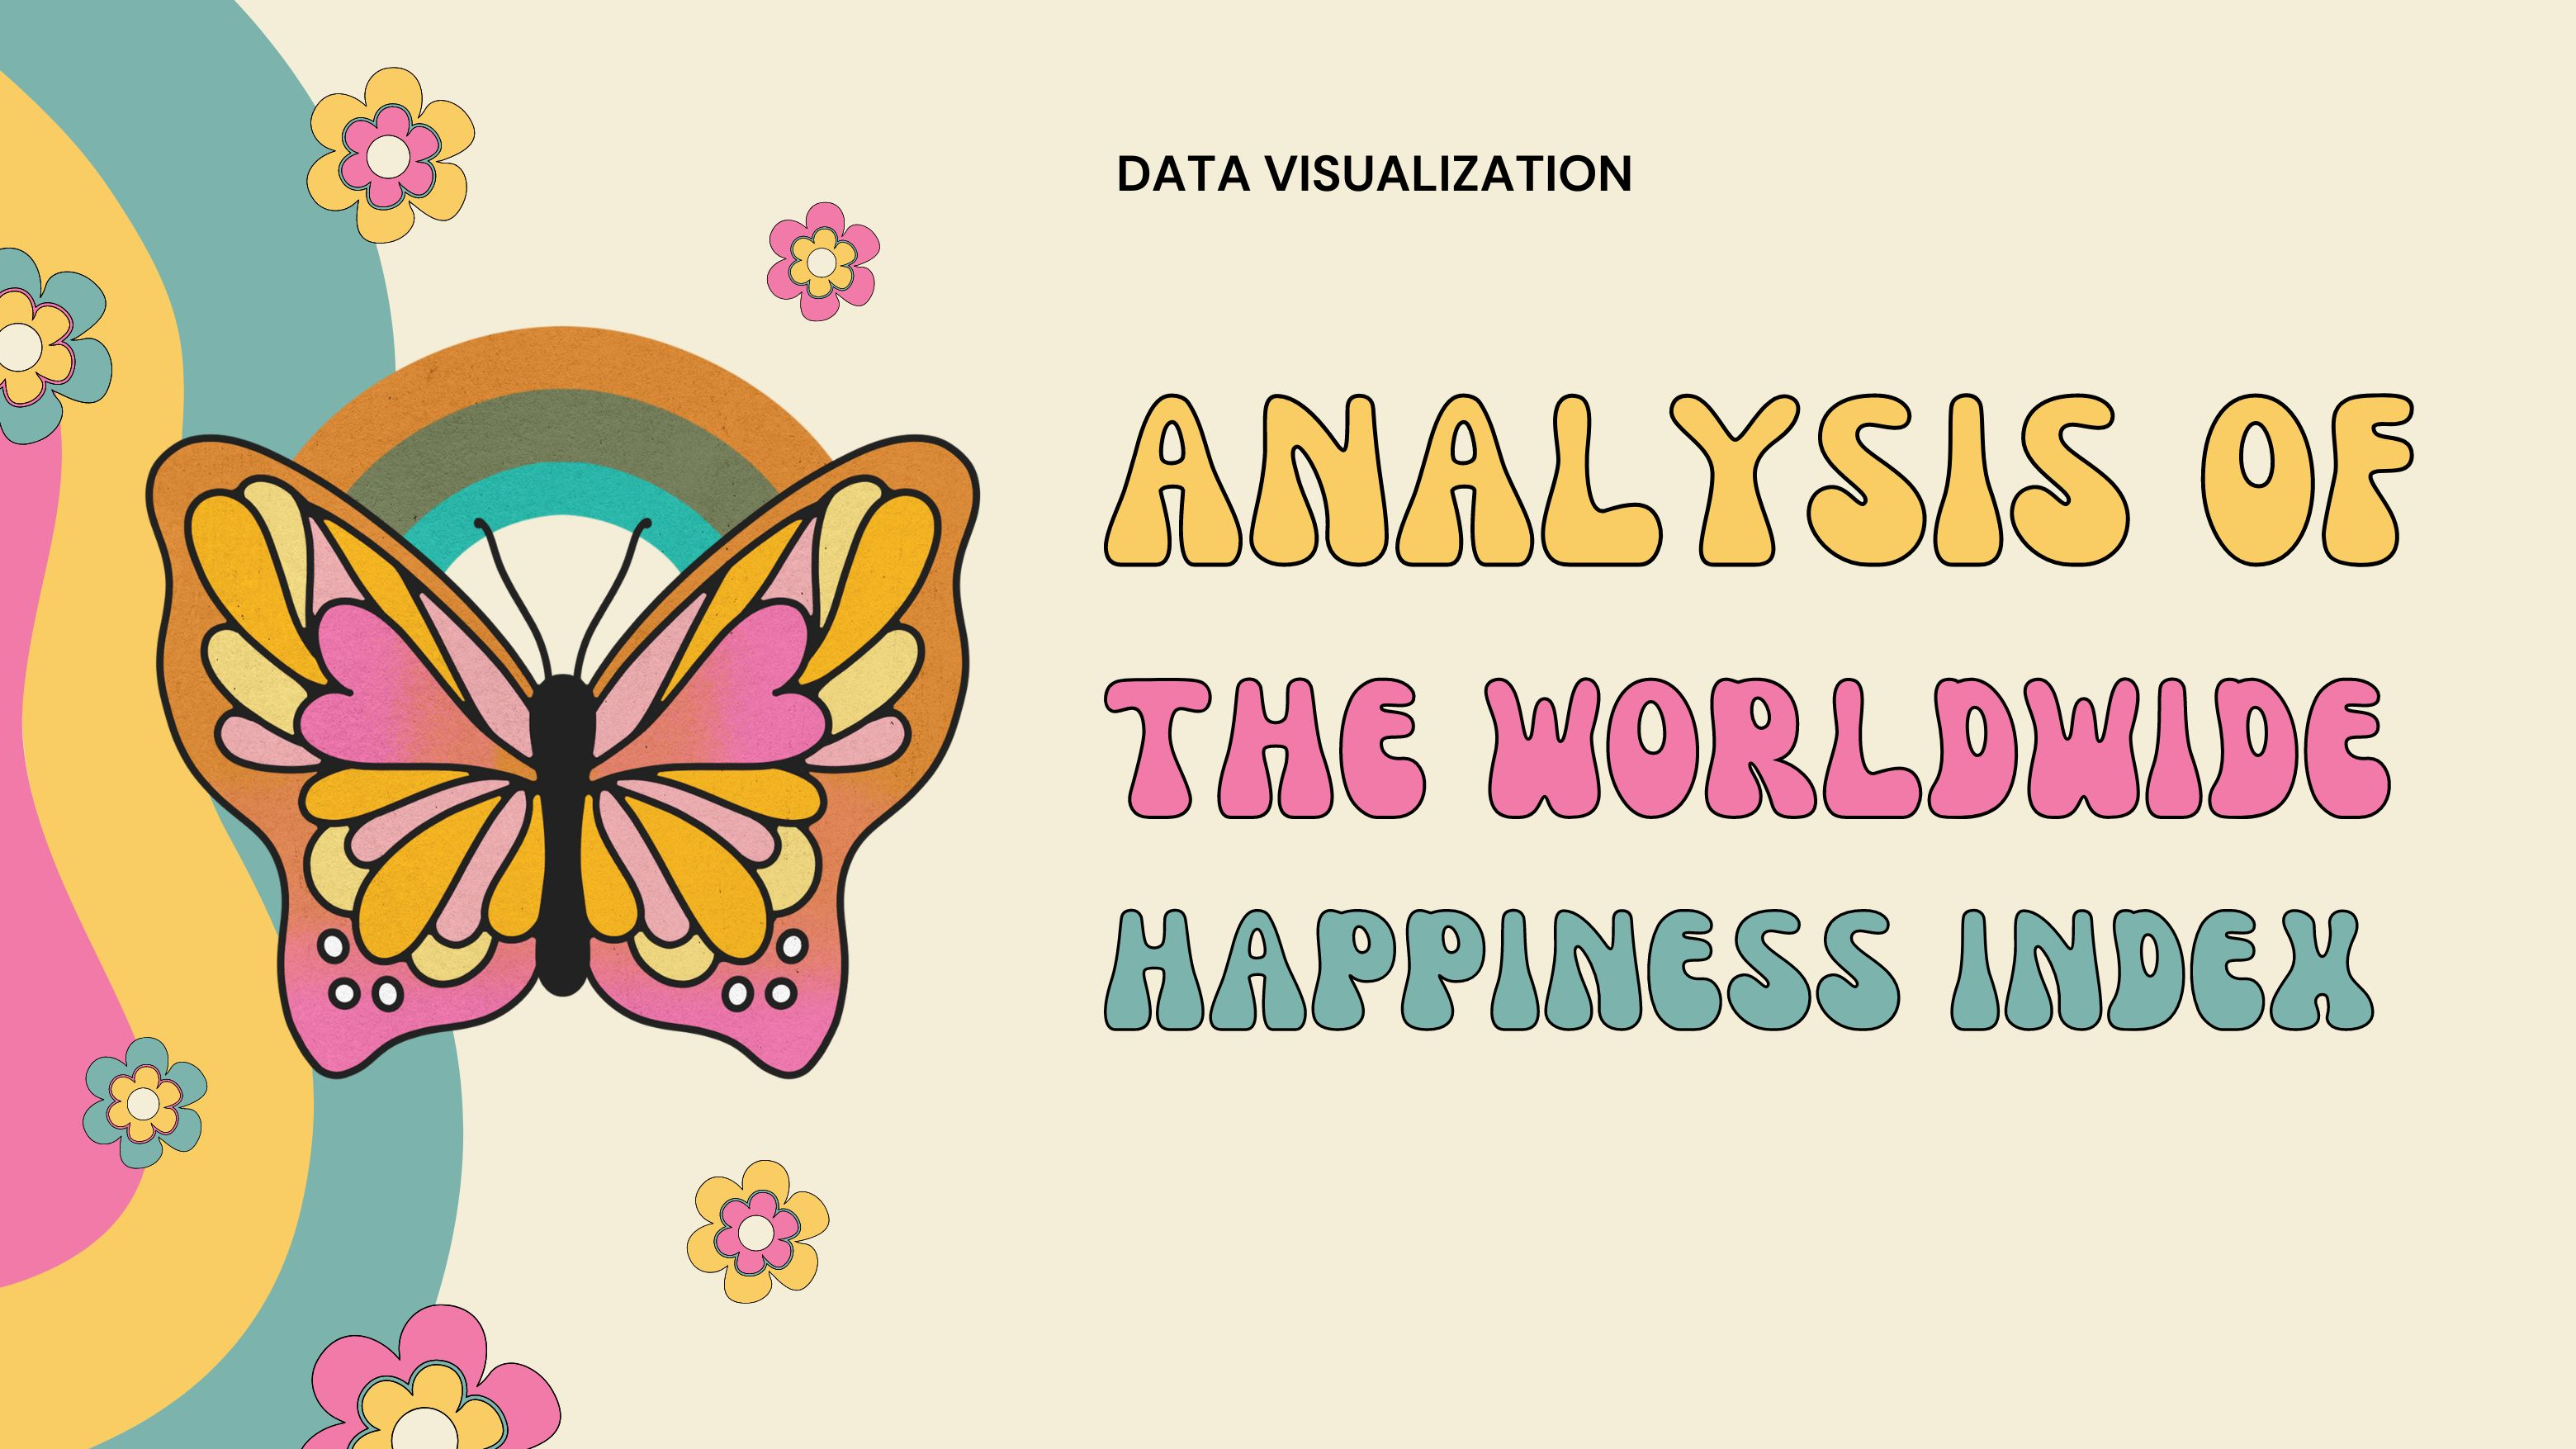

#Analysis of the World Happiness Reports from 2015-2022

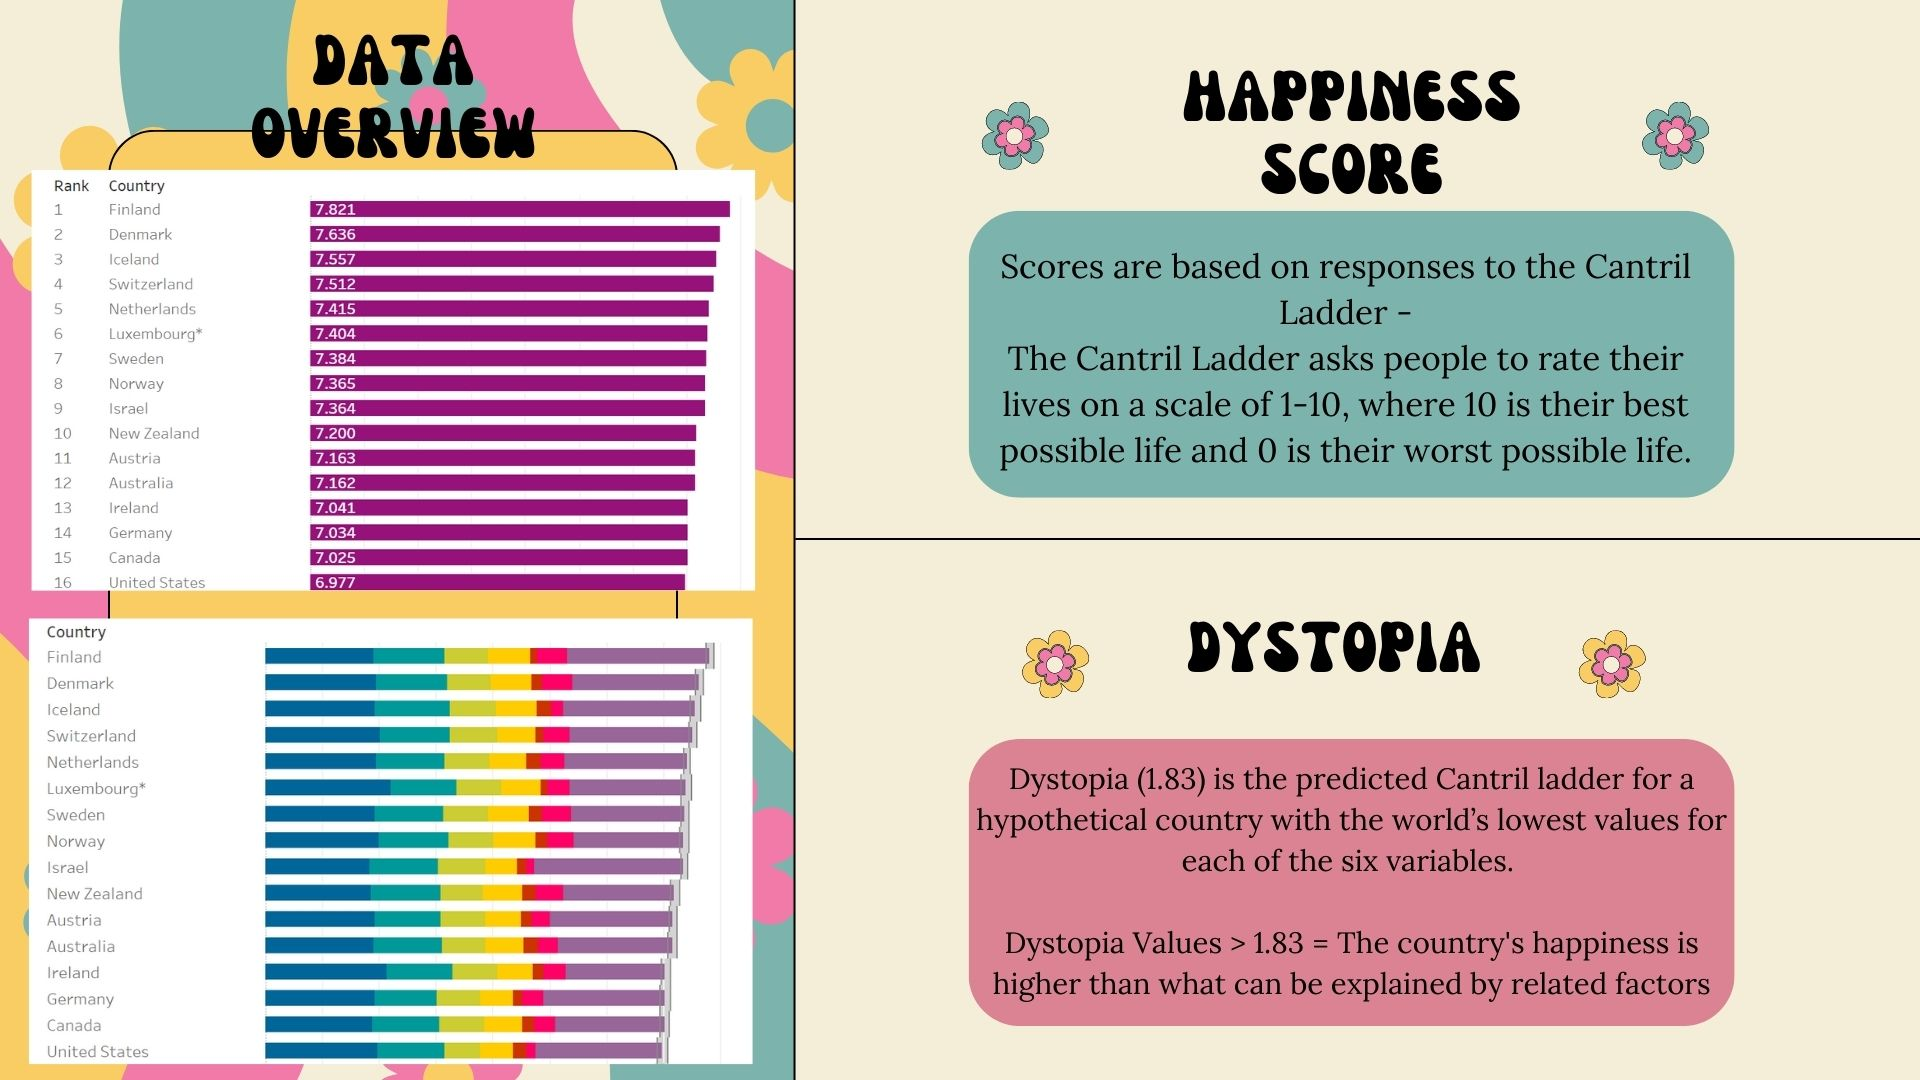

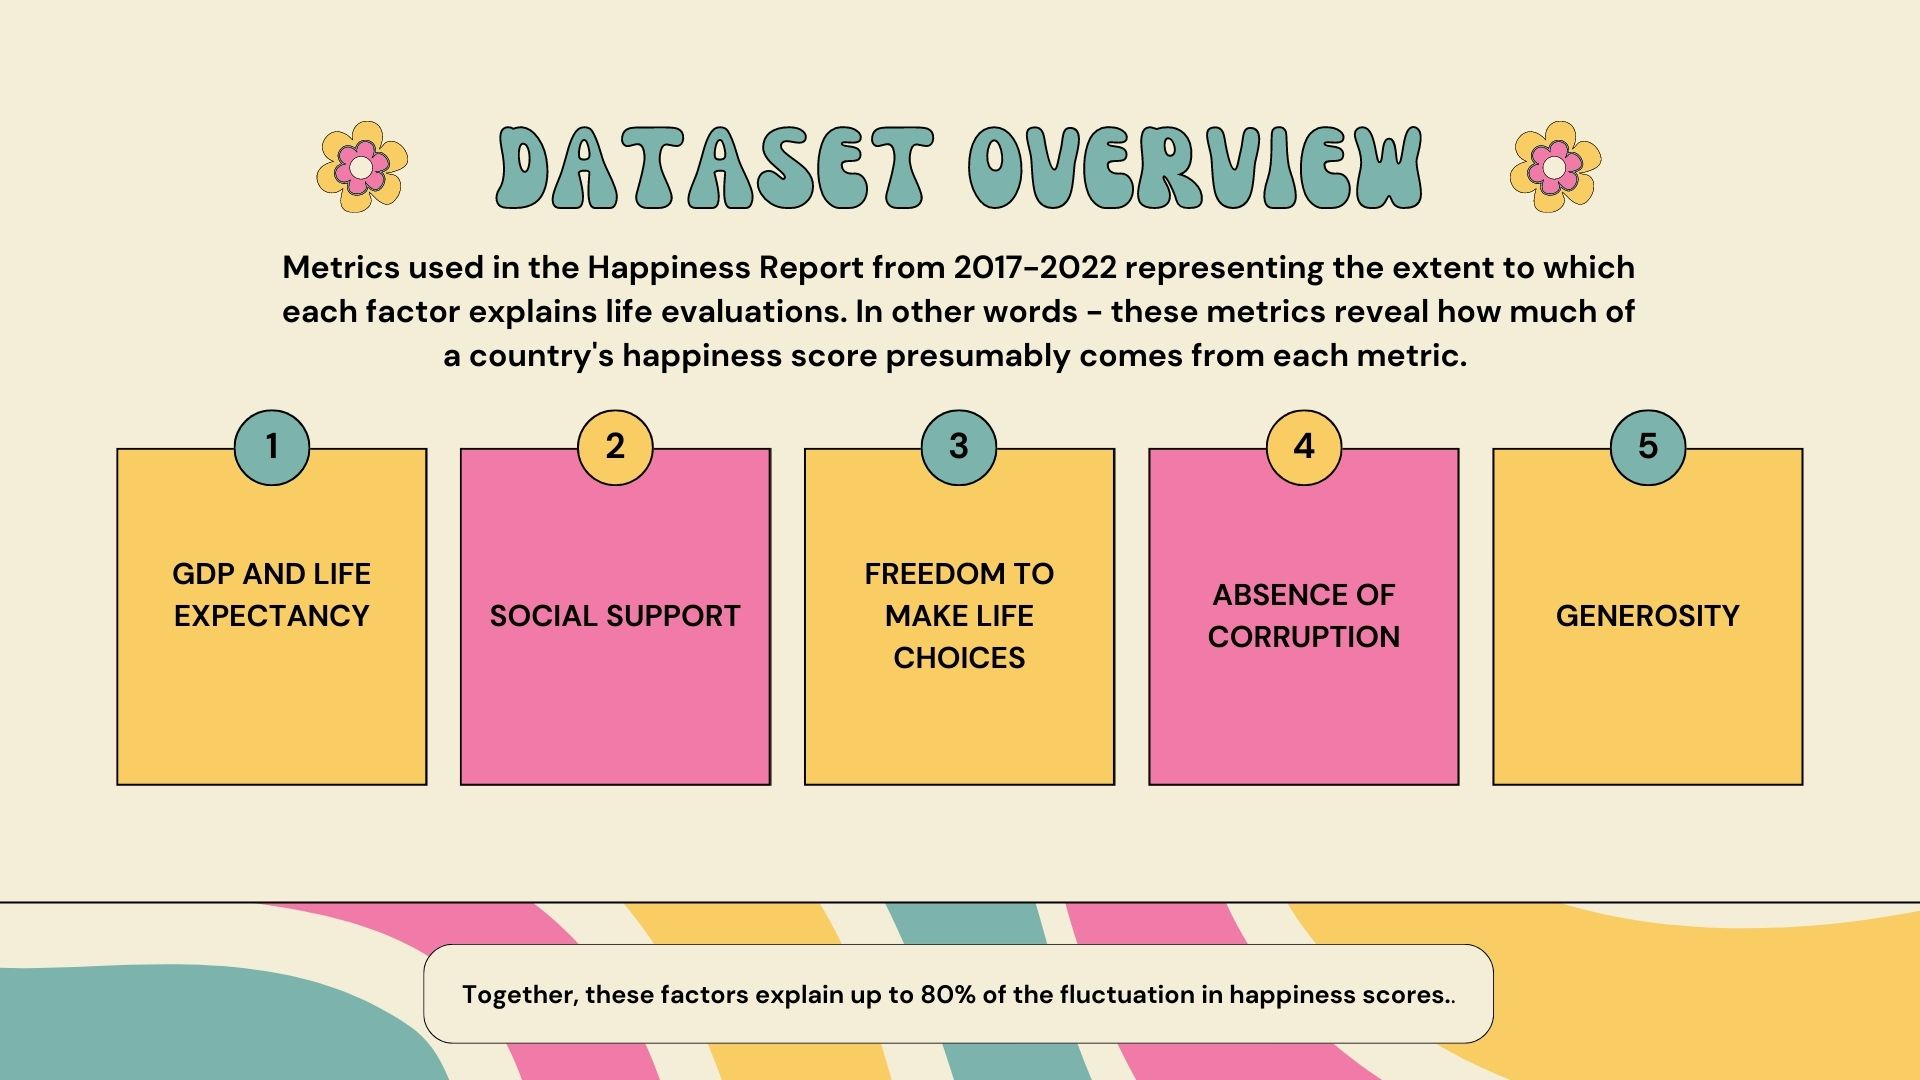

#Data Cleaning and Formatting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.animation as animation
%matplotlib notebook
%matplotlib inline

In [ ]:
H2015 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2015.csv?token=GHSAT0AAAAAAB4CWOERHJEM2DTXTMNYYRXIY4TVXOQ")
H2016 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2016.csv?token=GHSAT0AAAAAAB4CWOERQDDB5PIXU54LZR7GY4TVYEA")
H2017 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2017.csv?token=GHSAT0AAAAAAB4CWOEQHJK4MGVPQNY6LF66Y4TV6FQ")
H2018 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2018.csv?token=GHSAT0AAAAAAB4CWOERUVIUQUEZ2KTTHYG6Y4TV6OQ")
H2019 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2019.csv?token=GHSAT0AAAAAAB4CWOEQEOFAVT2NN6ASHN3GY4TV63A")
H2020 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2020.csv?token=GHSAT0AAAAAAB4CWOER4BOF75CCKZ3DF27GY4TV7FA")
H2021 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2021.csv?token=GHSAT0AAAAAAB4CWOEQSEBKVYJTQ32AAA7SY4TV7QA")
H2022 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2022.csv?token=GHSAT0AAAAAAB4CWOEQFOH567L7NL34XNDMY4TV7YQ")

In [ ]:
Cols = ['Happiness Score', 'Dystopia', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']
H2015['Year'] = 2015
H2016['Year'] = 2016
H2017['Year'] = 2017
H2018['Year'] = 2018
H2019['Year'] = 2019
H2020['Year'] = 2020
H2021['Year'] = 2021
H2022['Year'] = 2022
for col in Cols:
  H2022[col] = H2022[col].str.replace(',','.')
H2022['Happiness Score'] = H2022['Happiness Score'].astype(float)
H2022.rename(columns={'Happiness score' : 'Happiness Score'}, inplace=True)
H2022['Region'] = H2021['Region']
H2019['Region'] = H2021['Region']
H2022.drop(146, axis=0, inplace=True)

In [ ]:
frames = [H2015, H2016, H2017, H2018, H2019, H2020, H2021, H2022]
dframes = [H2015, H2016, H2017, H2020, H2021, H2022]
result = pd.concat(frames, join="inner")
dystopia = pd.concat(dframes, join="inner")

In [ ]:
result = result[result.groupby('Country').Country.transform(len) == 8]
result = result.dropna(how='all')

In [ ]:
sns.set(rc={'figure.figsize':(15,4),'axes.facecolor':'#E7D6CC', 'figure.facecolor':'white'})
color=sns.color_palette("Paired")
color

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

##Exploratory Analysis

I wanted to take a look at the correlations between the factors before I dove in. These visualizations aren't "publish worthy," but they're helpful for me to see trends I could/should explore in the data. The pairplot is an efficient way to view all of them at once in an easy-to-read and easy-to-create way.

In [ ]:
columns = ['Happiness Score', 'GDP', 'Corruption', 'Generosity', 'Freedom', 'Life Expectancy', 'Dystopia']

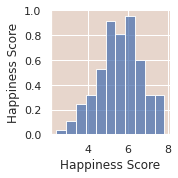

In [ ]:
sns.pairplot(H2022[columns])

From these graphs, the correlations I find most interesting include:

1. The happiness score has the strongest correlation with GDP, Life Expectancy, and freedom to make life choices. 
2. As the happiness score goes up, so does the amount of Dystopia. Countries who are less happy are more likely to see things as they are, while happier countries are more likely to consider themselves happier.
3. A vast majority of countries that have high perceptions of corruption are also the happiest countries.
4. At a certain level of GDP, the amount of corruption sharply increases. Very few countries have a high GDP and low levels of corruption.

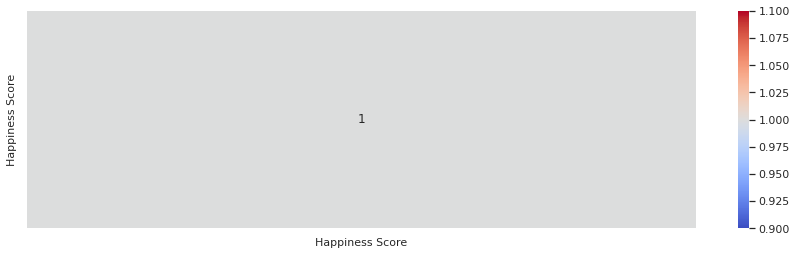

In [ ]:
sns.heatmap(H2022[columns].corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

I found it interesting that corruption  has a high correlation with every other indicator except generosity and dystopia.

When countries are more generous, they tend to be percieved as less corupt.

When countries have a higher corruption, people tend to negatively view their happiness. 

#The Big Questions

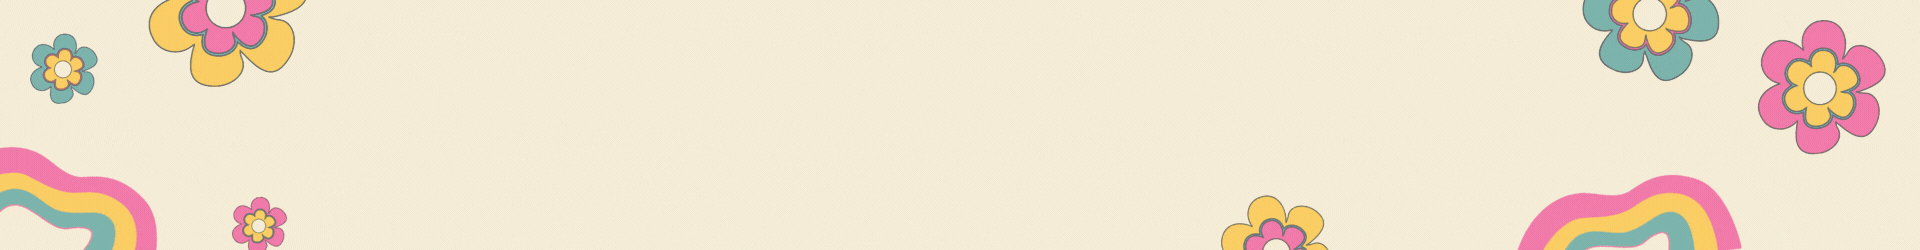

I chose to represent the regions' happiness using box/whisker plots in order to show not only the average happiness, but also the range of each region. 

[Text(0.5, 1.0, 'Happiness by Region in 2015')]

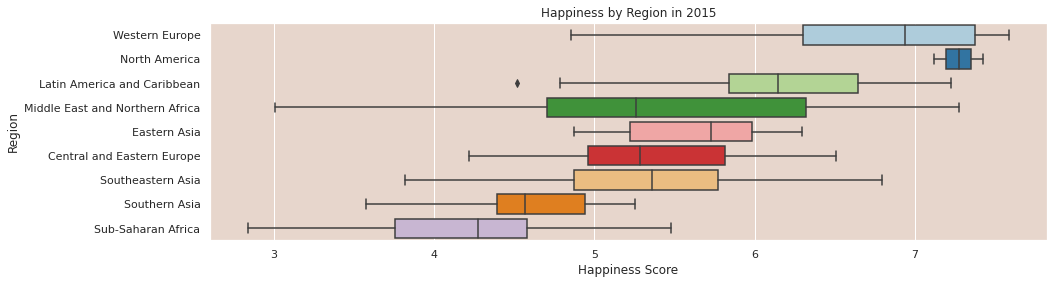

In [ ]:
order1 = ['Western Europe', 'North America', 'Latin America and Caribbean', 'Middle East and Northern Africa','Eastern Asia', 'Central and Eastern Europe', 'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa']
sns.boxplot(x=H2015['Happiness Score'],y=H2015['Region'], palette=color, orient="h", order = order1).set(title='Happiness by Region in 2015')

[Text(0.5, 1.0, 'Happiness by Region in 2022')]

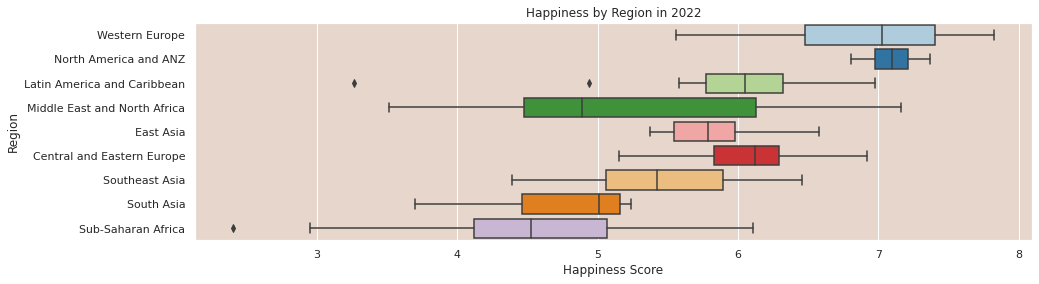

In [ ]:
order = ['Western Europe', 'North America and ANZ', 'Latin America and Caribbean', 'Middle East and North Africa','East Asia', 'Central and Eastern Europe', 'Southeast Asia', 'South Asia', 'Sub-Saharan Africa']
sns.boxplot(x=H2022['Happiness Score'],y=H2022['Region'], palette=color, orient="h", order=order).set(title='Happiness by Region in 2022')

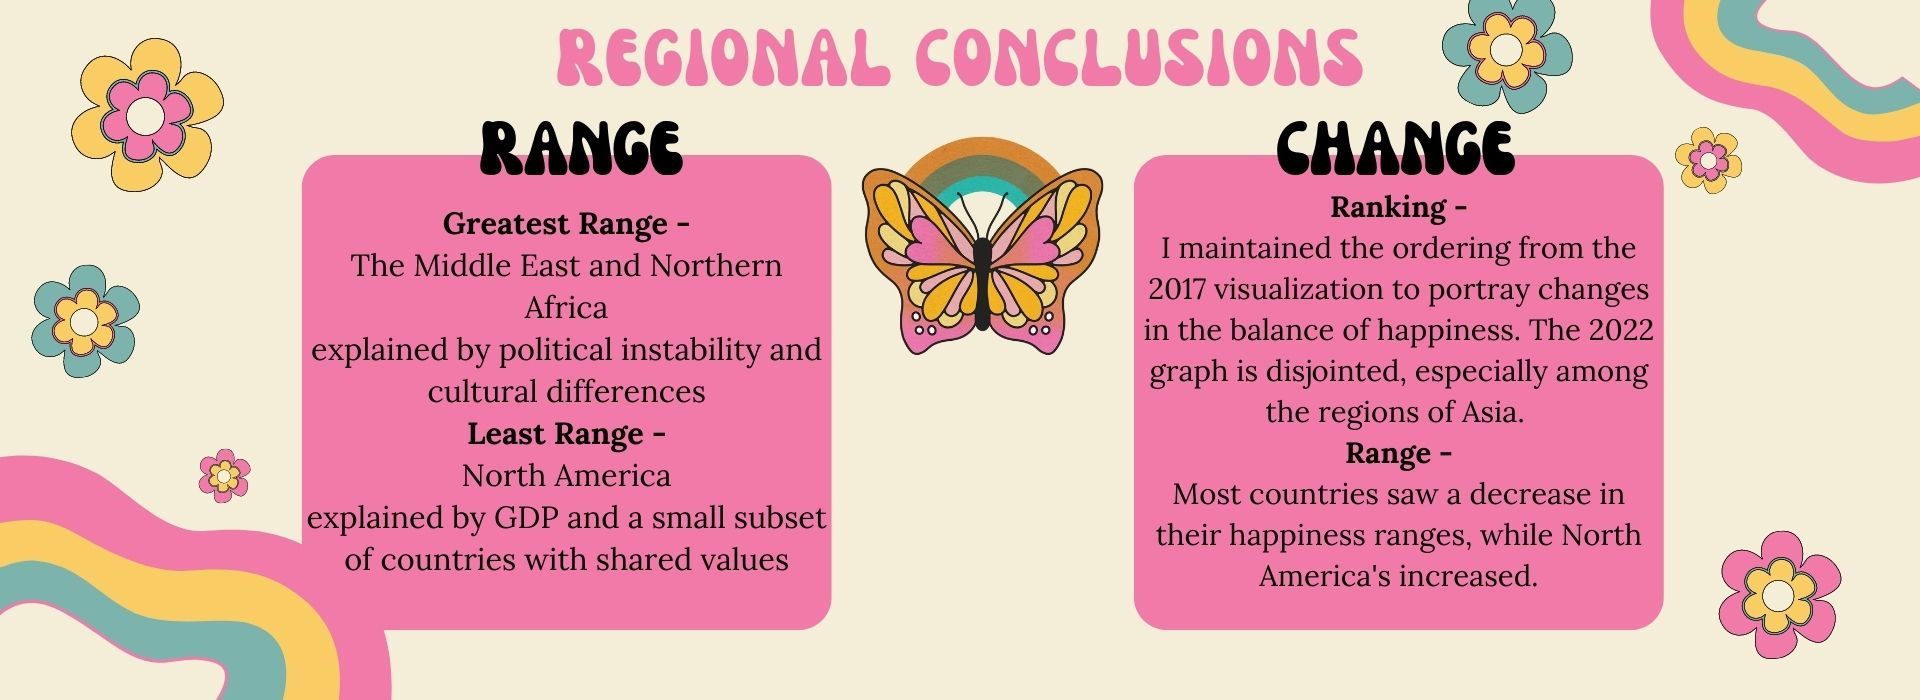

In [ ]:
groupresult = result
groupresult.set_index('Country')
groupresult['Region'] = H2022['Region']
groupresult.reset_index(inplace=True)

In [ ]:
df_groups = groupresult.groupby(['Region', 'Year'])['Happiness Score'].mean()

In [ ]:
df = df_groups.to_frame()
df.reset_index(inplace = True)
df.set_index(['Year'], inplace = True)

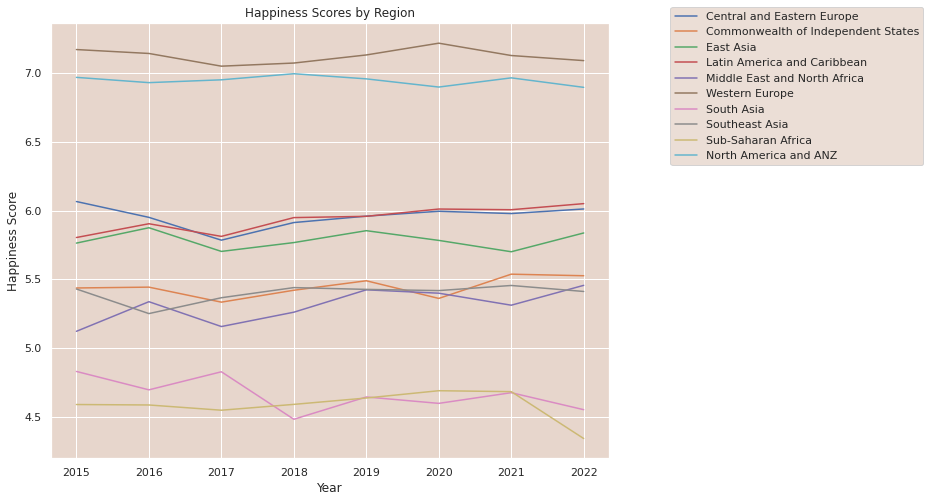

In [ ]:
labels = ['Central and Eastern Europe', 'Commonwealth of Independent States', 'East Asia', 'Latin America and Caribbean', 'Middle East and North Africa' ,'Western Europe', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'North America and ANZ']
fig, ax = plt.subplots(figsize=(10,8))
bp = df.groupby('Region').plot(ax=ax)
ax.set_ylabel('Happiness Score')
ax.set_title('Happiness Scores by Region')
ax.legend(labels, bbox_to_anchor=(1.1, 1.05))

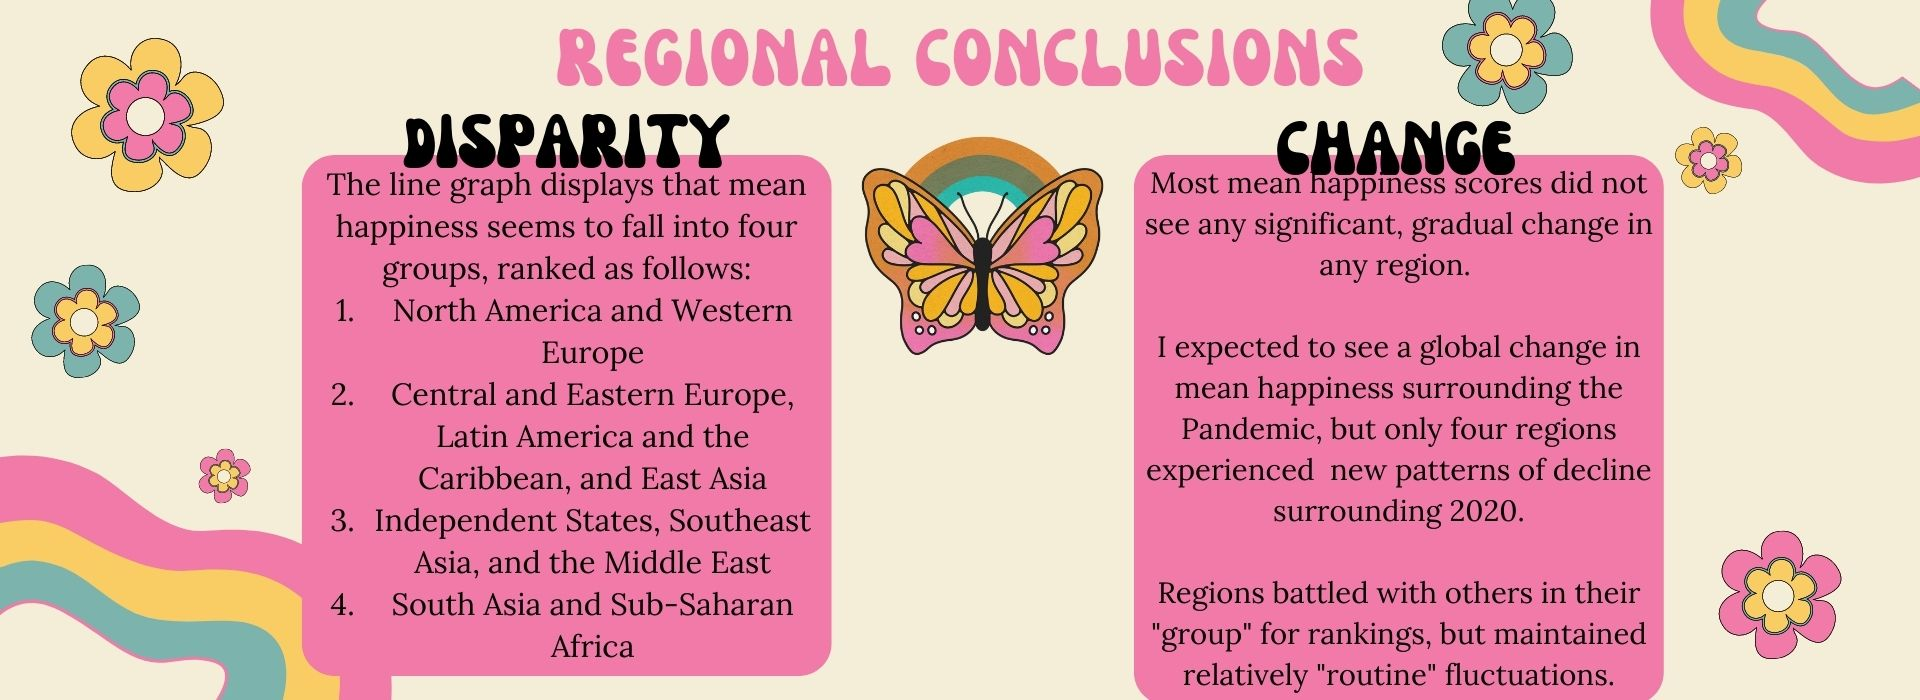

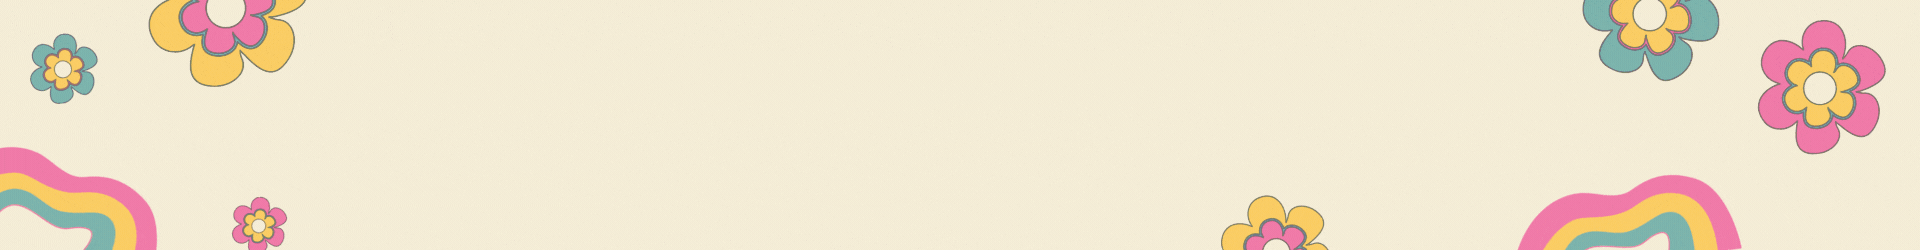

In my data exploration, I noticed an interesting and significant correlation between the absence of corruption and the other factors. I wanted to further explore the correlation between wealth and corruption. I decided to include happiness in the mix, as this project is about exploring the conditions of happiness across the globe. 

Perceptions of corruption are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government in this country or not?” and “Is corruption widespread within businesses in this country or not?”

In [ ]:
Cols = ['Happiness Score', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']
for col in Cols:
    H2022[col] = H2022[col].astype(float)

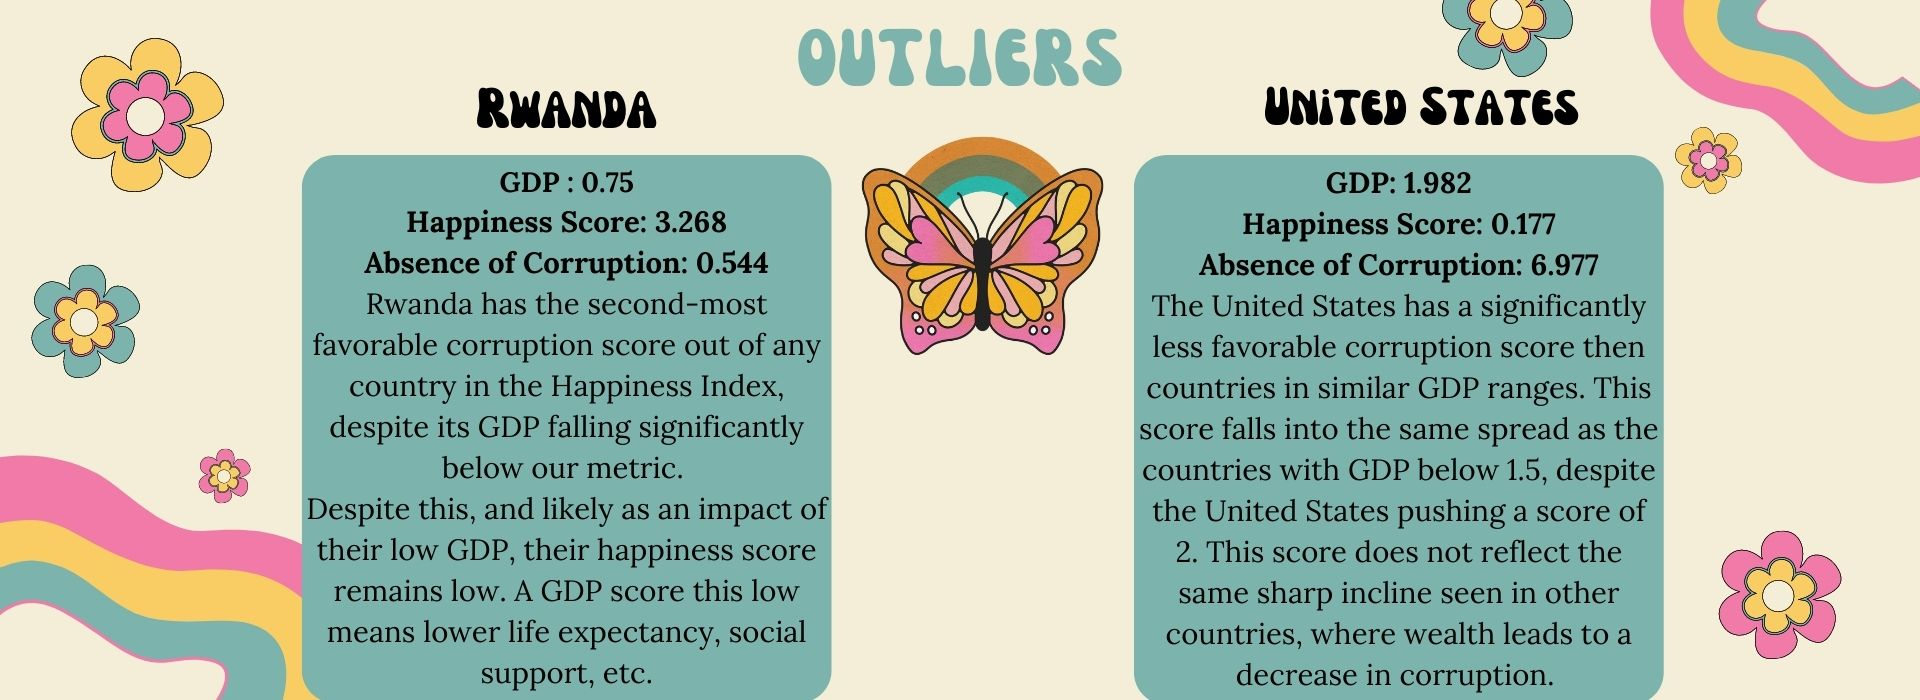

In [ ]:
fig = px.scatter(H2022, x="GDP", y="Corruption", 
                 color='Happiness Score',
           hover_name="Country",
           title = "GDP and The Absence of Corruption",
           size_max = 60)
fig.show()

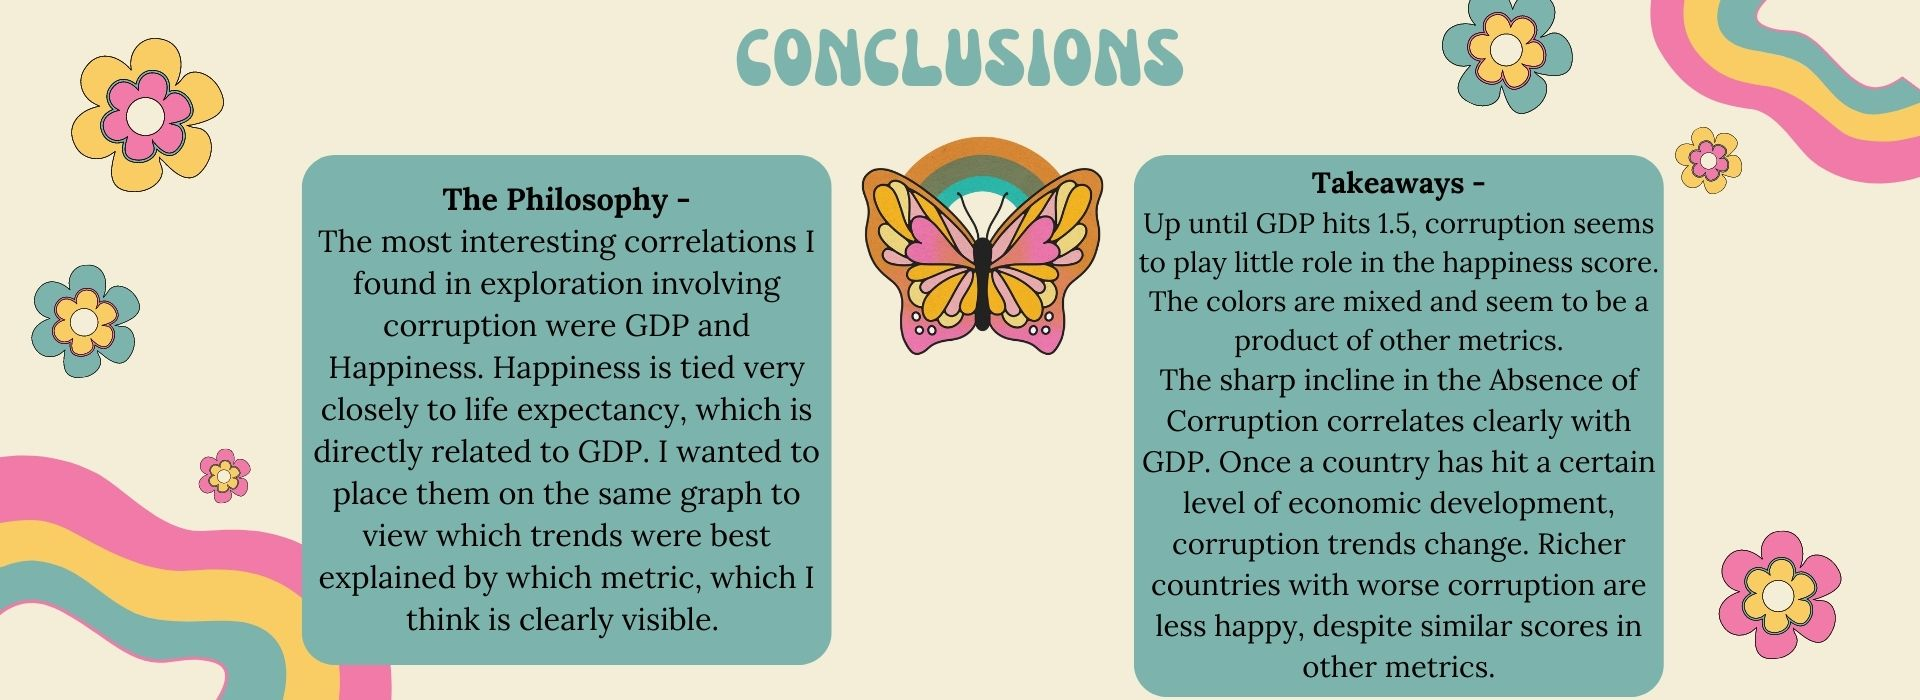

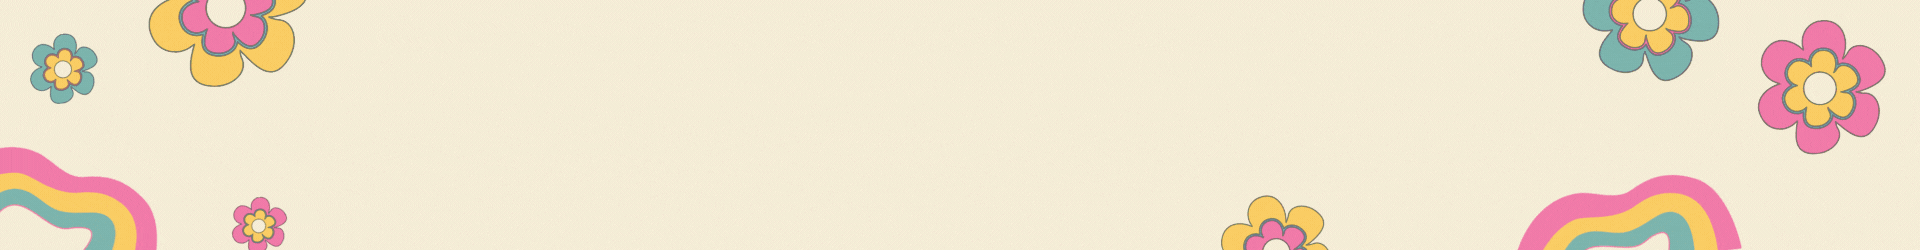

In order to tell a story of global happiness, I decided to create an animated choropleth map of happiness scores over the past seven years. You're able to view the years individually, zoom in and focus on different regions, and watch any one country's story. I chose to do this kind of visualization for the flexibility, functionality, and the fun.

In [ ]:
plt.style.use("seaborn-notebook")


fig = px.choropleth(result.sort_values('Year'),
                    color_continuous_scale = 'RdYlGn',
                   locations = 'Country',
                   color = 'Happiness Score',
                   locationmode = 'country names',
                   animation_frame = 'Year')
fig.update_layout(title = "Happiness Scores from 2017 to 2022")
fig.show()

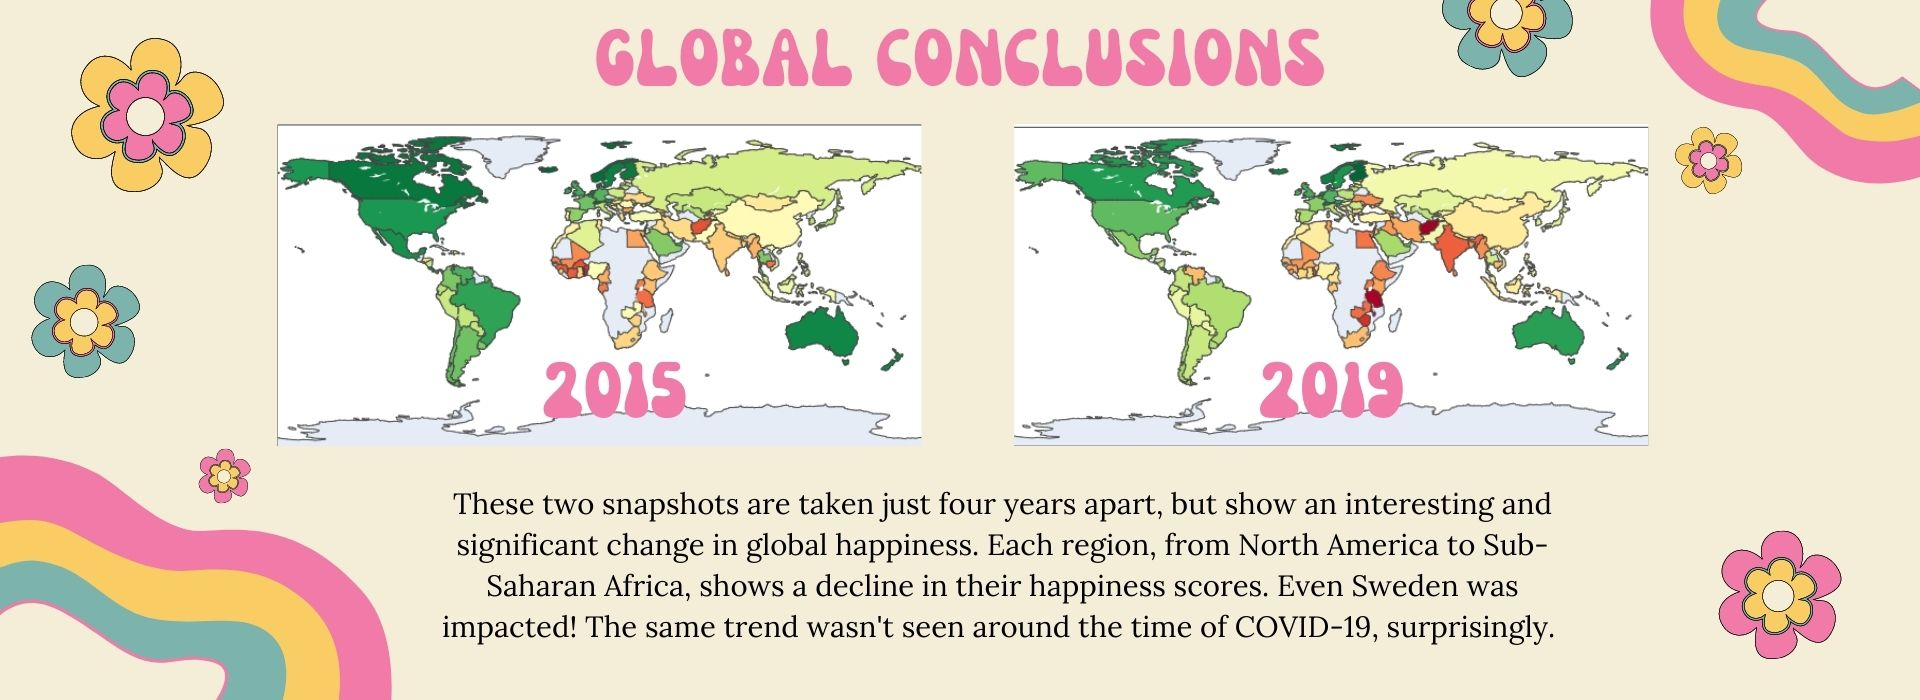

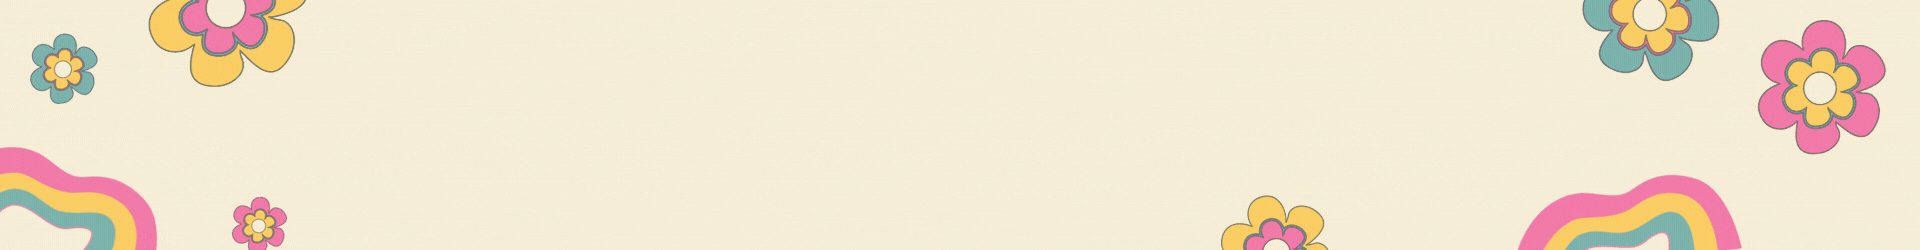

In [ ]:
US = H2022[H2022['Country'] == 'United States']
categories = ['Dystopia', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']
US = US.T

In [ ]:
means = pd.DataFrame()
means = H2022.mean()

<ipython-input-65-52e9c46f63bf>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
means.drop(means.index[[0,1,9]], inplace=True)
dfm = means.to_frame()

In [ ]:
dfm.columns = ['Score']

In [ ]:
dfm

Score
Dystopia         1.831808
GDP              1.410445
Family           0.905863
Life Expectancy  0.586171
Freedom          0.517226
Generosity       0.147377
Corruption       0.154781

In [ ]:
US.drop(US.index[[0,1,2,3,4,12,13]], inplace= True)

In [ ]:
US.columns =['Score']

In [ ]:
print(US)

                 Score
Dystopia         2.214
GDP              1.982
Family           1.182
Life Expectancy  0.628
Freedom          0.574
Generosity        0.22
Corruption       0.177


[Text(0.5, 1.0, 'United States Happiness Score')]

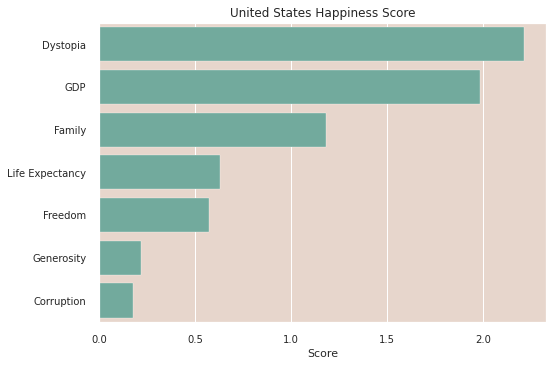

In [ ]:
sns.barplot(
    x="Score", 
    y=US.index, 
    data=US, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2').set(title='United States Happiness Score')

[Text(0.5, 1.0, 'Global Happiness Score')]

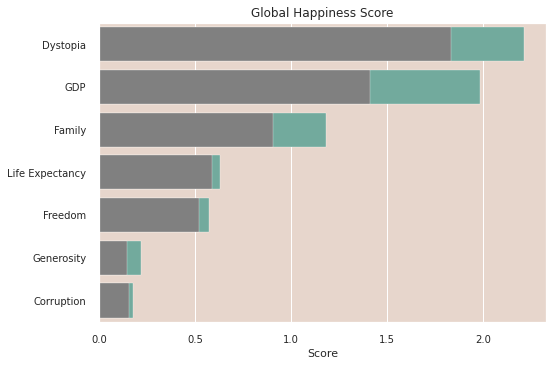

In [ ]:
fig, ax = plt.subplots()
sns.barplot(
    x="Score", 
    y=US.index, 
    data=US, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    ax=ax).set(title='United States Happiness Score')
sns.barplot(
    x="Score", 
    y=dfm.index, 
    data=dfm, 
    estimator=sum, 
    ci=None, 
    color='grey',
    ax=ax).set(title='Global Happiness Score')


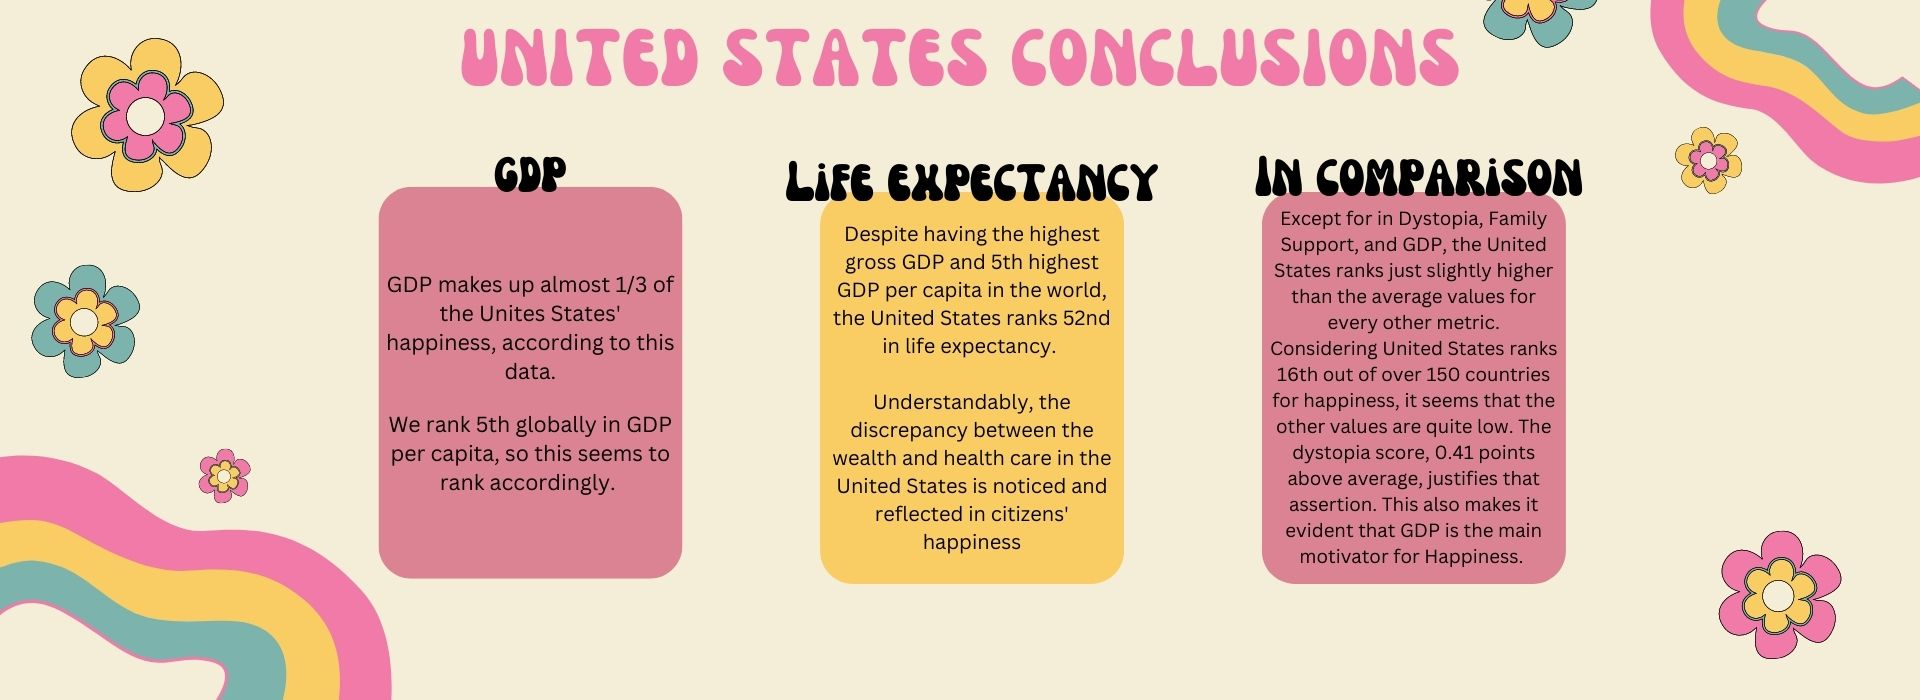

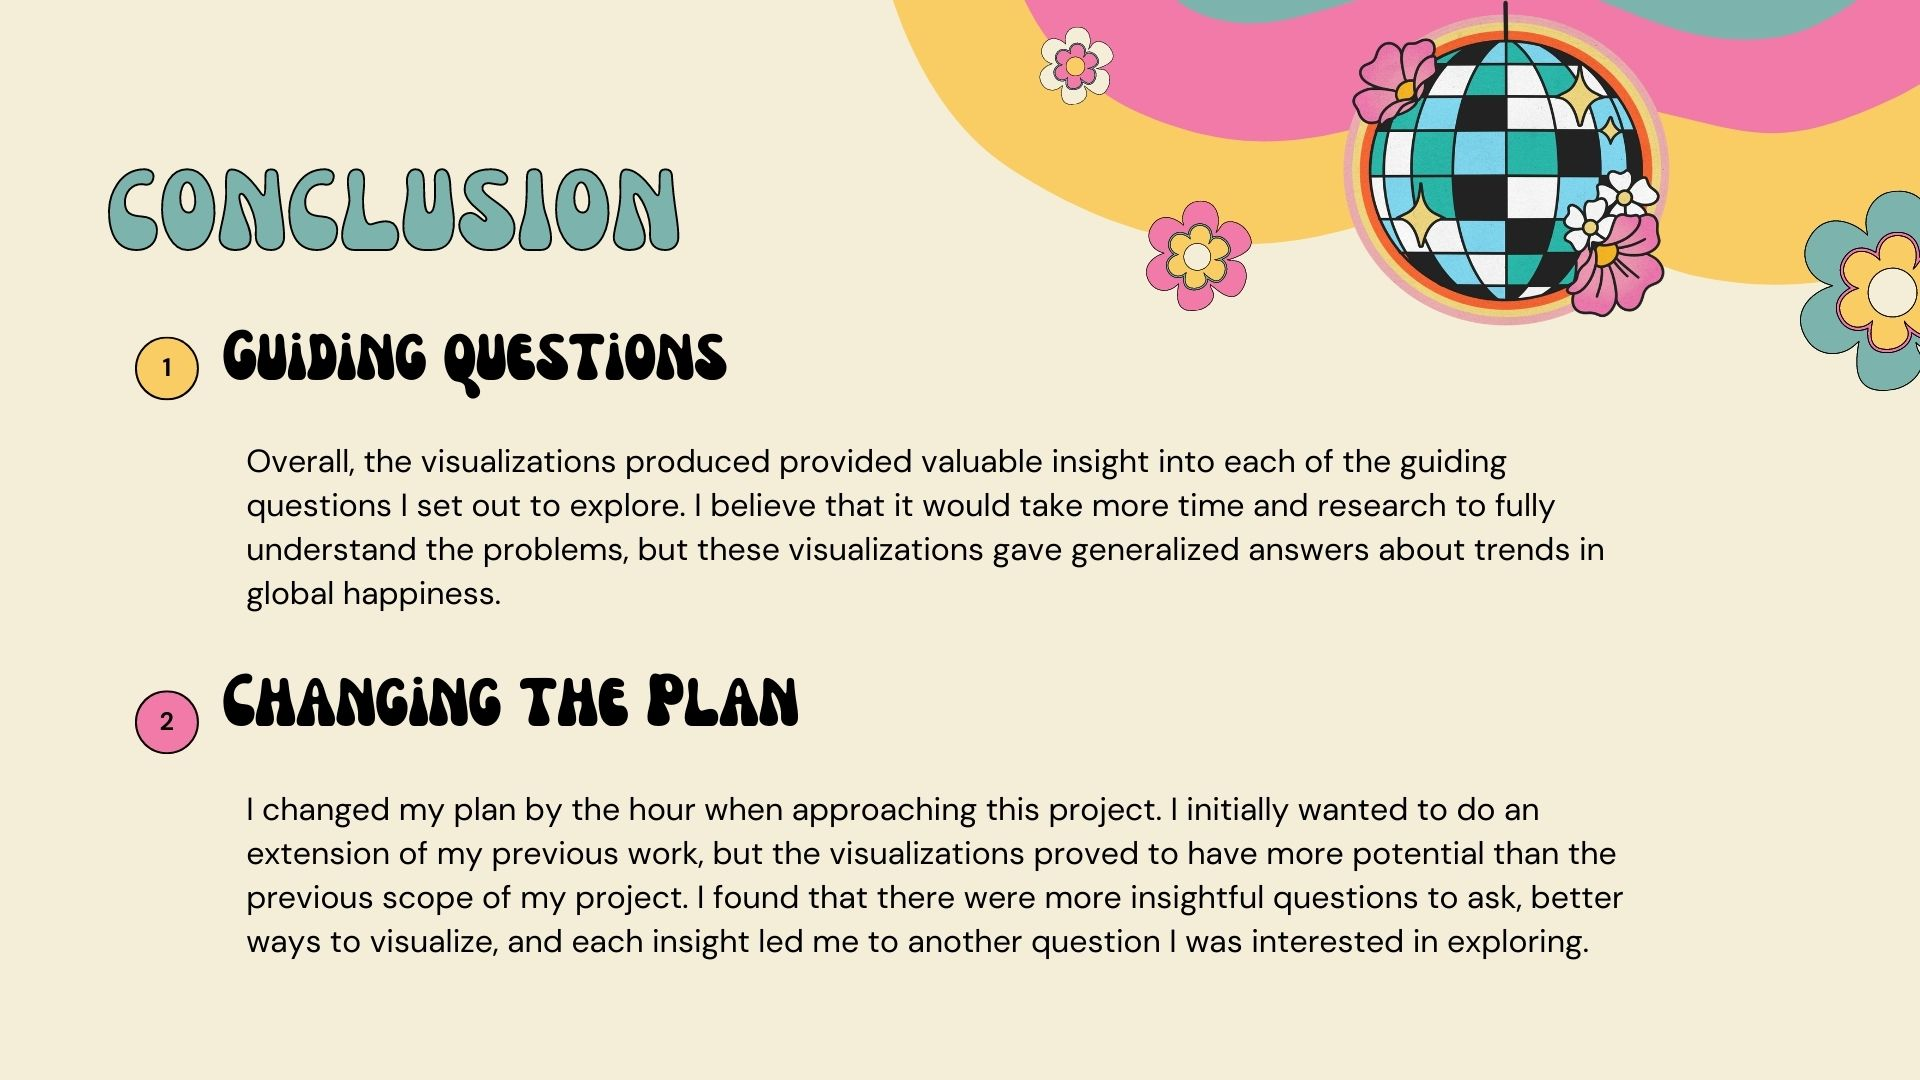